In [2]:
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix,roc_curve,auc,precision_recall_curve

In [7]:
data_method = 'unbalance'
names = [
    #"Nearest Neighbors",
    "Linear SVM",
    #"Neural Net",
    #"Neural Net_clinical20",
    #"Neural Net_select20",
    "RBF SVM",
    #"RBF SVM_select",
    #"RBF SVM_clinical",
    #"Neural Net",
    
    #"AdaBoost",
    #'transformer'
]

In [8]:
def plot_roc(data_method, name):
    fpr_sum = []
    tpr_sum =[]
    auc_sum = []
    mean_fpr = np.linspace(0, 1, 100)
    for i in range(1,6):
        df_roc = pd.read_csv(f"./kd_roc/{data_method}/{name}_roc{i}.csv")
        fpr, tpr, thresholds = roc_curve(df_roc['test'], df_roc['prob'])
        #print(len(df_roc['prob']))

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        roc_auc = auc(fpr, tpr)
        interp_tpr[0] = 0.0
        #fpr_sum.append(fpr)
        tpr_sum.append(interp_tpr)
        auc_sum.append(roc_auc)
    #print(fpr)
    #print(np.array(fpr_sum))
    #print(np.sum(np.array(fpr_sum),1))
    mean_tpr = np.mean(tpr_sum, axis=0)
    mean_tpr[-1] = 1.0
        
        
    return mean_fpr,mean_tpr, np.sum(auc_sum)/5

def tpr_tnr(data_method):
    tnr_sum = []
    tpr_sum =[]

    df_tnr = pd.read_csv(f"./kd_roc/{data_method}/tnr.csv")
    df_tpr = pd.read_csv(f"./kd_roc/{data_method}/tpr.csv")

    df_tnr_transformer = pd.read_csv(f"./kd_roc/{data_method}/transformer_tnr.csv")
    df_tpr_transformer = pd.read_csv(f"./kd_roc/{data_method}/transformer_tpr.csv")

    return pd.concat([df_tpr, df_tpr_transformer], axis=1),pd.concat([df_tnr, df_tnr_transformer], axis=1)
    



In [9]:
def plot_recall_precison(data_method, name):
    precision_sum = []
    recall_sum =[]
    auc_sum = []
    mean_p = np.linspace(0, 1, 100)
    for i in range(1,6):
        df_roc = pd.read_csv(f"./kd_roc/{data_method}/{name}_roc{i}.csv")
        
        precision, recall, thresholds = precision_recall_curve(df_roc['test'], df_roc['prob'])
        interp_recall = np.interp(mean_p, precision, recall)
        interp_recall[0] = 1.0
        recall_sum.append(interp_recall)
        
        pr_auc = auc(recall, precision)
        auc_sum.append(pr_auc)

    mean_recall = np.mean(recall_sum, axis=0)
    mean_recall[-1] = 0.0
        
        
    return mean_p,mean_recall,np.sum(auc_sum)/5


[0.08861261 0.18290654 0.23148552 0.25147824 0.3067496  0.34695495
 0.39172809 0.45168951 0.484      0.5416249  0.58749113 0.63106573
 0.64494713 0.66752098 0.6798564  0.693003   0.70160005 0.73507313
 0.74931302 0.75974577 0.77128241 0.78806816 0.80369703 0.81210787
 0.82238857 0.83267267 0.84410265 0.84981199 0.85901231 0.86779656
 0.86877925 0.8765045  0.8765045  0.88243694 0.89071558 0.89275884
 0.89372084 0.89468284 0.89794595 0.90335135 0.90335135 0.91299512
 0.91777768 0.93152402 0.9409686  0.94917587 0.95248117 0.95308378
 0.95940645 0.96036827 0.96399675 0.96495856 0.96592038 0.96936101
 0.96996841 0.97043477 0.96793695 0.9707266  0.97355229 0.97634194
 0.98190429 0.98770055 0.98821653 0.98873251 0.9892485  0.98976448
 0.99028046 0.99079644 0.99131243 0.99182841 0.99234439 0.99286037
 0.99337635 0.99389234 0.99440832 0.9949243  0.99544028 0.99595627
 0.99647225 0.99698823 0.99216697 0.99268014 0.99319332 0.99102453
 0.9915855  0.99214647 0.99270743 0.9932684  0.99382937 0.9943

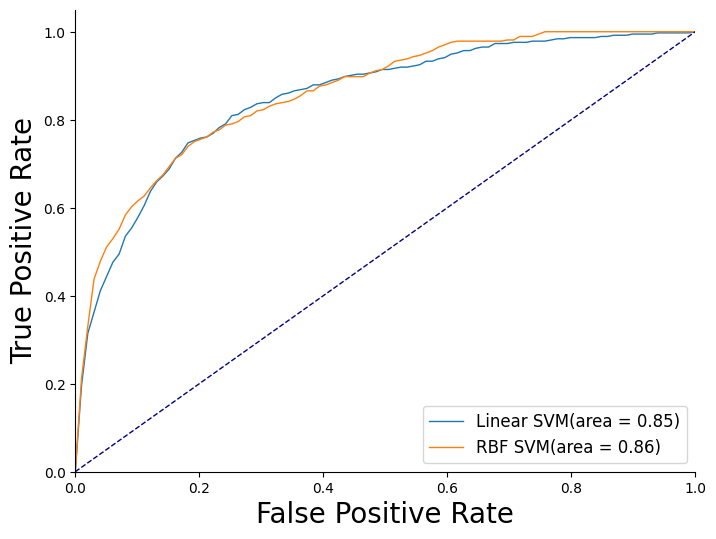

In [10]:
plt.figure(figsize=(8,6))
roc_kde = pd.read_csv('./kd_roc/unbalance/KDE_roc_mean.csv')
lw = 1
for name in names[:]:
    fpr_,tpr_,auc_ = plot_roc(data_method, name)
    gmeans = np.sqrt(tpr_ * (1-fpr_))
    ix = np.argmax(gmeans)
    #print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    plt.plot(fpr_, tpr_, lw=lw, label=name+'(area = %0.2f)' % auc_)
    
    #plt.scatter(fpr_[ix], tpr_[ix], marker='o',s=25)
print(roc_kde['fpr_mean'].values)
#plt.plot(roc_kde['tpr_mean'].values, roc_kde['fpr_mean'].values, lw=lw, label='KDE'+'(area = %0.2f)' % auc(roc_kde['tpr_mean'], roc_kde['fpr_mean']),c = 'k')
gmeans = np.sqrt(roc_kde['fpr_mean'].values * (1-roc_kde['tpr_mean'].values))
ix = np.argmax(gmeans)
#print(roc_kde['fpr_mean'].values[ix])
#print(roc_kde['tpr_mean'].values[ix])
#plt.scatter(roc_kde['tpr_mean'].values[ix], roc_kde['fpr_mean'].values[ix], marker='o',s=25,c='k')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize = 20)
plt.ylabel('True Positive Rate',fontsize = 20)
#plt.title('Mean ROC (downsample)',fontsize = 20)
plt.legend(loc="lower right",fontsize = 12)
ax = plt.gca()  # Get the current Axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig('./exp_figs/kd_roc_feature_selection_group_all.tiff',dpi = 150)


In [ ]:
plt.plot(roc_kde['tpr_mean'].values, roc_kde['fpr_mean'].values, lw=lw)
roc_kde

In [22]:
tpr_, tnr_ = tpr_tnr(data_method)
tpr_

,Nearest Neighbors,Linear SVM,RBF SVM,Neural Net,AdaBoost,transformer
0,0.813333,0.760000,0.840000,0.813333,0.800000,0.760000
1,0.786667,0.706667,0.746667,0.813333,0.720000,0.773333
2,0.743243,0.729730,0.851351,0.810811,0.756757,0.797297
3,0.702703,0.797297,0.837838,0.797297,0.675676,0.743243
4,0.837838,0.783784,0.824324,0.783784,0.770270,0.851351


In [14]:
tpr_.mean(0)

Nearest Neighbors    0.776757
Linear SVM           0.755495
RBF SVM              0.820036
Neural Net           0.803712
AdaBoost             0.744541
transformer          0.817369
dtype: float64

In [15]:
tnr_.mean(0)

Nearest Neighbors    0.733946
Linear SVM           0.758982
RBF SVM              0.757850
Neural Net           0.762942
AdaBoost             0.759123
transformer          0.719943
dtype: float64

Nearest Neighbors
Linear SVM
RBF SVM
Neural Net
AdaBoost
transformer


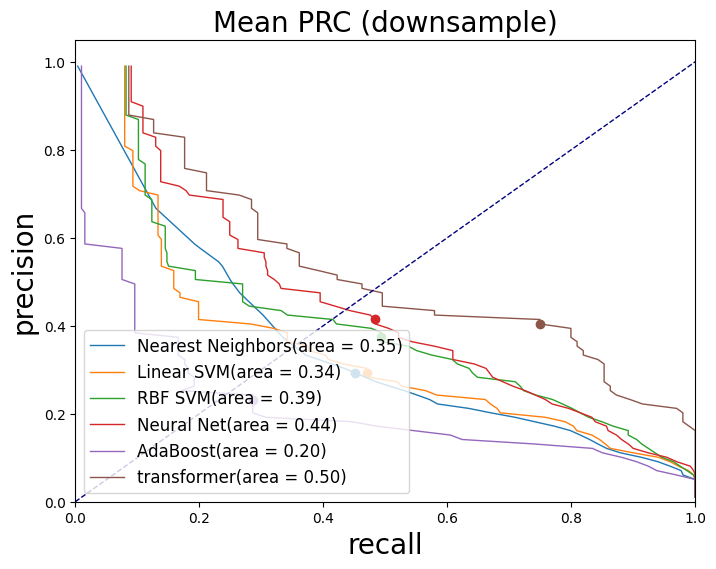

In [8]:
plt.figure(figsize=(8,6))
lw = 1
for name in names:
    print(name)
    precision_,recall_,auc_ = plot_recall_precison(data_method, name)
    #print((precision_ + recall_)[:2])
    fscore = (2 * precision_[1:-1] * recall_[1:-1]) / (precision_[1:-1] + recall_[1:-1])
    ix = np.argmax(fscore)
    #print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    plt.plot(recall_[1:-1],precision_[1:-1], lw=lw, label=name+'(area = %0.2f)' % auc_)
    plt.scatter(recall_[ix], precision_[ix], marker='o')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('recall',fontsize = 20)
plt.ylabel('precision',fontsize = 20)
plt.title('Mean PRC (downsample)',fontsize = 20) 
plt.legend(loc="lower left",fontsize = 12)
#plt.savefig('./exp_figs/kd_prc_unbalance.tiff',dpi = 200)

In [23]:
ss = np.array([1,2])

In [15]:
bb = [2,3]

In [24]:
1-ss


array([ 0, -1])

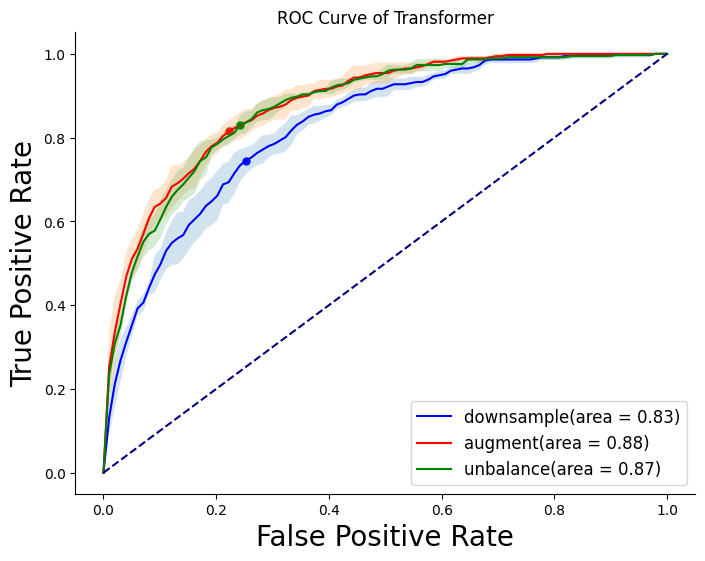

In [65]:

method_list = ['downsample','augment','unbalance']
color_list = ['b','r','g']
k=0
plt.figure(figsize=(8, 6))
for data_method in method_list:
    
    tpr_sum = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i in range(1, 6):
        df_roc = pd.read_csv(f"./kd_roc/{data_method}/transformer_roc{i}.csv")
        fpr, tpr, thresholds = roc_curve(df_roc['test'], df_roc['prob'])
        
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tpr_sum.append(interp_tpr)
    
    mean_tpr = np.mean(tpr_sum, axis=0)
    mean_tpr[-1] = 1.0
    std_tpr = np.std(tpr_sum, axis=0)  # Standard deviation of tpr
    

    #plt.plot(mean_fpr, mean_tpr,label=f'{data_method}')
    plt.plot(mean_fpr, mean_tpr,c = color_list[k], label=f'{data_method}'+'(area = %0.2f)' % auc(mean_fpr, mean_tpr))
    gmeans = np.sqrt(mean_tpr * (1-mean_fpr))
    ix = np.argmax(gmeans)
    plt.scatter(mean_fpr[ix], mean_tpr[ix], c = color_list[k], marker='o',s=25)
    # Adding the shade
    plt.fill_between(mean_fpr, mean_tpr - std_tpr, mean_tpr + std_tpr, alpha=0.2)
    k = k+1
ax = plt.gca()  # Get the current Axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate',fontsize = 20)
plt.ylabel('True Positive Rate',fontsize = 20)
plt.title('ROC Curve of Transformer')
plt.legend(loc="lower right",fontsize = 12)
plt.savefig('./exp_figs/kd_transformer_datasets.tiff',dpi = 200)


# Example usage: plot_roc_method('your_data_method', 'your_model_name')
